## Anaerobic growth of _Saccharomyces cerevisiae_

<img src="Y1.png" width="800" />

Please note to **only use the following units on your presentation:**

|$\mu \qquad \qquad$|$\theta \qquad \qquad $|$C_{ET} \qquad \qquad $|$Q_{CO_2} \qquad \qquad $|$r_i \qquad \qquad $
|-|-|-|-|-
|$\frac{1}{h}$|$\frac{mol \, ATP}{cmol \, X \cdot h} $|$\frac{g}{L} $|$\frac{mL}{min}$|$\frac{cmol }{cmol \,X \cdot h} $

### Assignment of experiment

The conditions of each experiment is given in the table below:

<img src="Extable.png" width="600" />

### What are we investigating?

In this experiment we will be looking at how fast _Saccharomyces cerevisiae_ (we call her _Cery_ in our lab) grows and also at the amount of energy required to sustain the growth. Different external conditions (fermenter concentrations) will be employed to see how it affects the growth and energy requirements of _Cery_. 

Start by fitting a constant 𝜇 on the data. Be careful in using time zero as the starting point for the fit since the first hour of fermentation is slower due to the organism waking up. Given the fitted 𝜇, calculate the CO₂ production rate in ml/min. Plot this 'model' on the CO₂ data and vary 𝛾 to improve the fit. Start by allowing for a contant 𝛾 over the duration of the run. 

After this you should model the fermentation CBI310 style. Test whether the constant 𝜇 and 𝛾 assumption is correct. What is the effect of ethanol formed during the reaction.

Ensure that you have your numbers (𝜇 and 𝛾) ready when called upon.

### Theoretical background

Under anaerobic conditions _Cery_ produces mainly ethanol as catabolic excretion product (there will be a small amount of glycerol to balance the NADH. The flux model of the system is supplied below:

<img src="etmap.png" width="680" />

We'll use the following physiological parameters:

|$\alpha $|$\beta $|$\theta $
|-|-|-
|$\frac{\text{cmol $CO_2$}}{\text{cmol X}}$|$\frac{\text{mol NADH}}{\text{cmol X}}$|$\frac{\text{mol ATP}}{\text{cmol X} \cdot \text{h}}$
|0.1|0.1|0.05

The biomass formula is given by $CH_{1.8}O_{0.5}N_{0.2}$

Ensure to set up a matrix of the flux model before entering the lab. 

Your experiment will entail measuring the volumetric rate of $CO_2$ production ($\frac{mL}{min}$) and the biomass amount ($\frac{g}{L}$) in the fermentation broth. This will enable calculation of $r_{CO_2}$ by using the ideal gas law. Assume that $CO_2$ in the glass pipette is at 25°C.

For the growth experiments the biomass concentration will be measured 5 times during the experiment. You will be able to observe the increase in biomass. For starters you will try to fit a constant $\mu$ to the growth data (remember the CBI310 exam 😉). Given $\mu$ and $r_{CO_2}$ data, you will be able to investigate the value of $\gamma$. Tip: Start by assuming a constant value of $\mu$ during the batch run before allowing for variations in $\mu$ during the run. 

In [218]:
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

In [219]:
α = 0.10 #cmolCO2/cmolX
β = 0.10 #molNADH/cmolX
θ = 0.05 #molATP/cmolX.h 

In [220]:
from numpy import array

In [221]:
data = array([[0,0.6],
              [1.5, 0.8482],
              [2.5, 0.9537],
              [3.5, 1.3007],
              [4.5, 1.6067],
              [5.5, 2.0595]])

In [222]:
texp = data[:,0]
Cxexp = data[:,1]

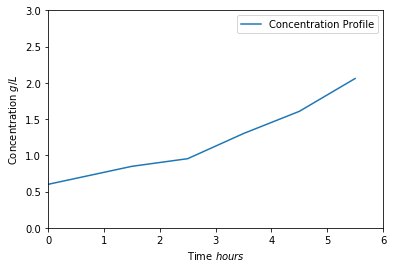

In [223]:
plt.plot(texp, Cxexp, '-', label = 'Concentration Profile')
plt.axis([0,6,0,3])
plt.legend(loc='best')
plt.ylabel("Concentration $g/L$")
plt.xlabel("Time $hours$")
plt.show()

In [224]:
μ = 0.26

def conc(C, t):
    C = C[0]
    return [μ*C]

Given the experimental data, the yeast provided may not have been pure, therefore, I varied the initial concentration of the yeast (Cxo) and then change the mu until the best fit resulted. At Cx0 = 0.5 and mu = 0.26, the best fit resulted.

In [225]:
from numpy import linspace
from scipy.integrate import odeint

In [226]:
tspan = linspace(0, 6, 100)

vals = odeint(conc, 0.5, tspan)

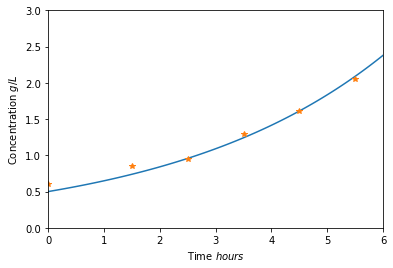

In [227]:
plt.figure(1)
plt.plot(tspan, vals, '-', texp, Cxexp, '*')
plt.axis([0, 6, 0, 3])
plt.ylabel("Concentration $g/L$")
plt.xlabel("Time $hours$")
plt.show()

In [228]:
# rCo2 [mL/min]
DataCO2 = array([[75, 2.60],
                 [105, 3.00],
                 [135, 3.70],
                 [165, 4.00],
                 [195, 4.70],
                 [225, 5.20],
                 [255, 6.10],
                 [285, 7.10],
                 [315, 8.10]])

In [229]:
texp1 = DataCO2[:,0]
rCexp = DataCO2[:,1]


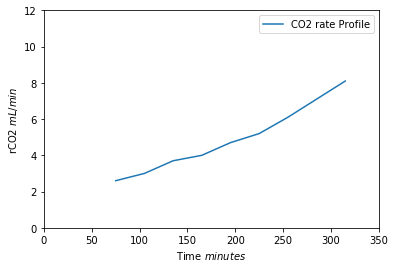

In [230]:
plt.figure(2)
plt.plot(texp1, rCexp, '-', label = 'CO2 rate Profile')
plt.axis([0, 350, 0, 12])
plt.legend(loc='best')
plt.ylabel("rCO2 $mL/min$")
plt.xlabel("Time $minutes$")
plt.show()

In [231]:
MMgluc = 12 + 2 + 16 #(cmol/g)
cmols = 35 / MMgluc
Cso = cmols/0.5 #35 grams of glucose was in the broth
print(Cso)
MMgluc

2.3333333333333335


30

In [232]:
MMx = 12 + 1.8 + 8 + (0.2*14)
cmolx = 0.6 / MMx #this amount was used for the mu fitting above
Cxo = cmolx/0.5
print(Cxo)
MMx

0.048780487804878044


24.6

In [255]:
γ = 5

In [256]:
def response(C):
    Cx, Cs, Cdhap, Cgly, Cet = C
    
    A = numpy.matrix([[-1, 1 + α,    1,    0,   0],
                     [  0,     0,   -1,    1, 1.5],
                     [  0,     β,    0, -1/3,   0],
                     [  0,    -γ, -1/3,    0,   1],
                     [  0,     1,    0,    0,   0]])
    
    b = numpy.matrix([0, 0, 0, θ, μ]).T
    r = numpy.linalg.solve(A, b)
    
    return[r[1,0],   # biomass
          -r[0,0],   # glucose, negative since flux calculates -rs 
           r[2,0],   # DHAP
           r[3,0],   # Glycerol
           r[4,0]]   # Ethanol
           #r[5,0]]   # CO2


In [257]:
def ferm(C,t):
    Cx, Cs, Cdhap, Cgly, Cet = C
    r=response([Cx, Cs, Cdhap, Cgly, Cet])
    
    return [r[0]*Cx,
            r[1]*Cx,
            r[2]*Cx,
            r[3]*Cx,
            r[4]*Cx]
            #r[5]*Cx]

In [258]:
Co = [Cxo, Cso, 0, 0, 0]
Co

[0.048780487804878044, 2.3333333333333335, 0, 0, 0]

In [259]:
test = response(Co)
test

[0.26000000000000006,
 -4.492000000000001,
 4.206,
 0.07800000000000003,
 2.7520000000000002]

In [260]:
tspan2 = linspace(0, 6, 100)

C = odeint(ferm, Co, tspan2)

Cx, Cs, Cdhap, Cgly, Cet = C.T


In [261]:
from numpy import asarray

In [262]:
r = asarray([response(C) for C in C])

rx    =  r[:,0]
rs    = -r[:,1]
rdhap =  r[:,2]
rgly  =  r[:,3]
ret   =  r[:,4]

In [263]:
R = 8.314
P = 87
T = 298.15

rCO2 = α*rx + 0.5*ret
VCO2 = (rCO2 * Cx)* R * T / P

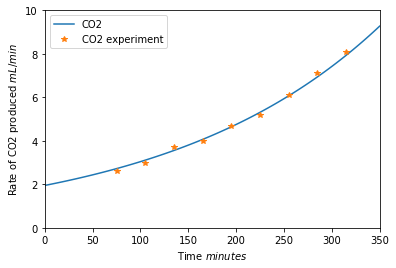

In [264]:
plt.figure(3)
plt.plot(tspan2*350/6, VCO2, '-', label='CO2') 
plt.plot(texp1, rCexp, '*', label='CO2 experiment')
plt.axis([0, 350, 0, 10])
plt.legend(loc='best')
plt.ylabel('Rate of CO2 produced $mL/min$')
plt.xlabel('Time $minutes$')
plt.show()